In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
from prophet import Prophet
from prophet.plot import plot_plotly
%matplotlib inline


In [2]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET (1).csv')

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
df['FullDate'] = pd.to_datetime(df['FullDate'])

In [6]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df_copy = df.copy()

In [9]:
df_copy.set_index(df_copy['FullDate'], inplace=True)

In [10]:
avg_yr = df_copy[['Tmax', 'SysLoad', 'GasPrice', 'ElecPrice']].resample('M').mean()

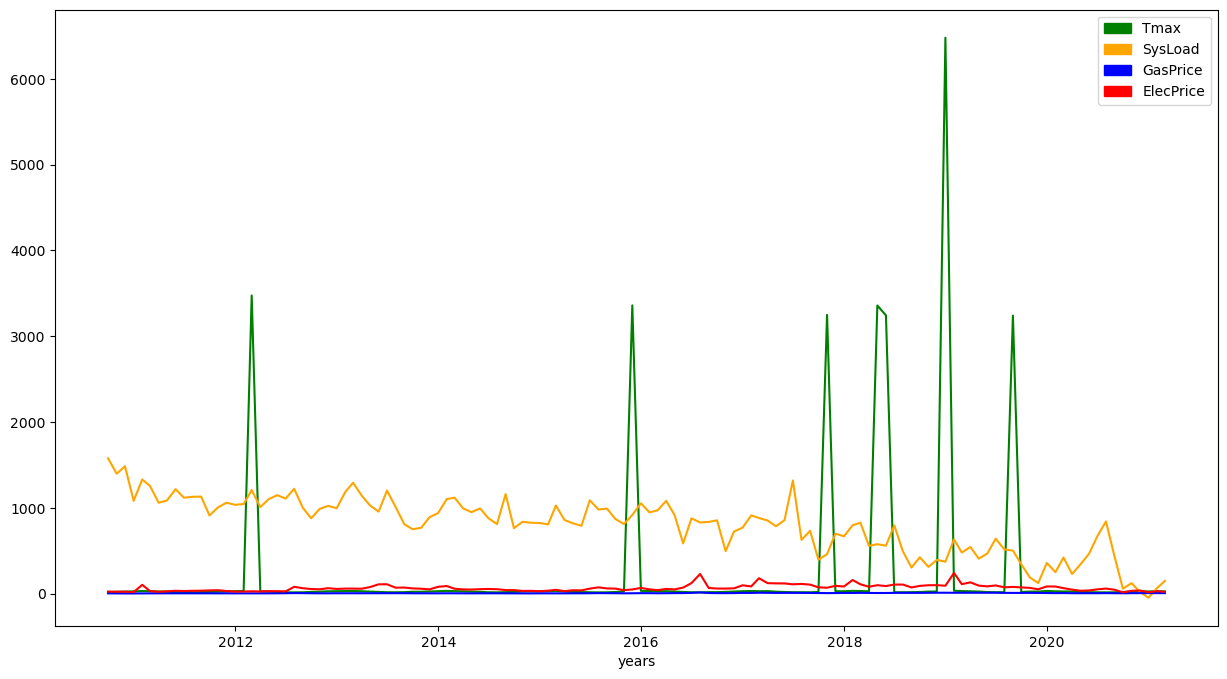

In [11]:
plt.figure(figsize=(15,8))
plt.xlabel('years')
plt.plot(avg_yr.index, avg_yr['Tmax'], color='g')
plt.plot(avg_yr.index, avg_yr['SysLoad'], color='orange')
plt.plot(avg_yr.index, avg_yr['GasPrice'], color='b')
plt.plot(avg_yr.index, avg_yr['ElecPrice'], color='r')

TM = mpatches.Patch(color='g', label='Tmax')
SL = mpatches.Patch(color='orange', label='SysLoad')
GS = mpatches.Patch(color='b', label='GasPrice')
EP = mpatches.Patch(color='r', label='ElecPrice')
plt.legend(handles=[TM, SL, GS, EP]);

In [12]:
avg_yr_EP = df_copy[['ElecPrice']].resample('D').mean()

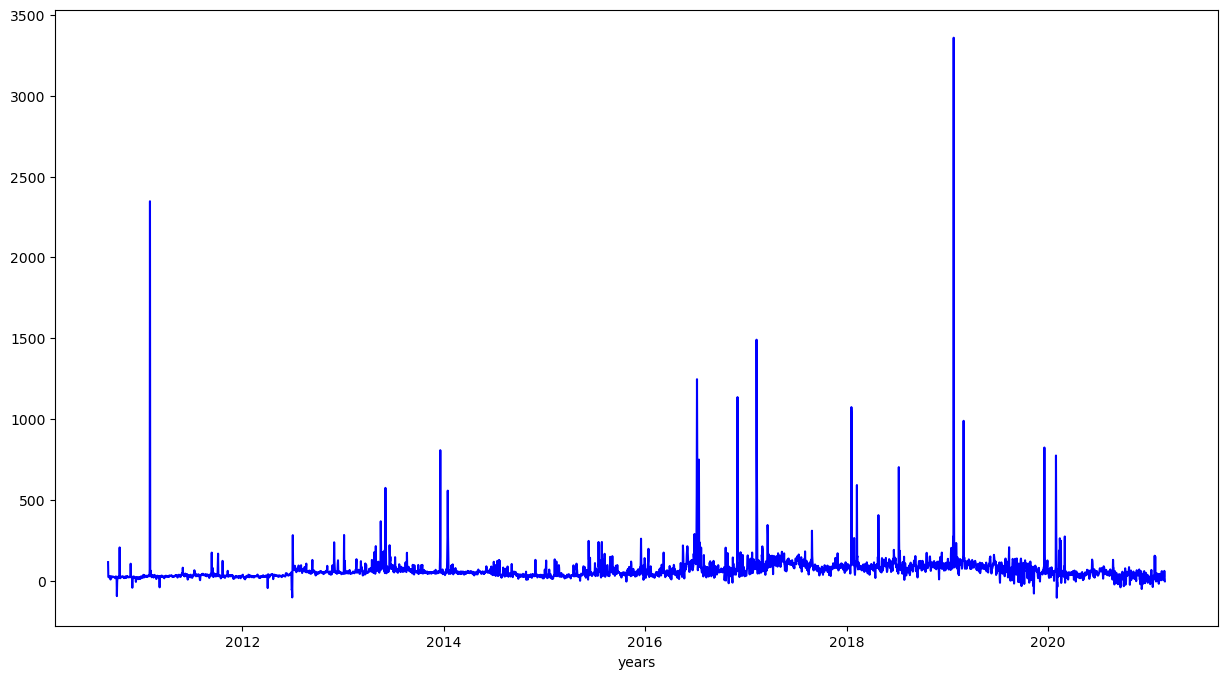

In [13]:
plt.figure(figsize=(15,8))
plt.xlabel('years')

plt.plot(avg_yr_EP.index, avg_yr_EP['ElecPrice'], color='b')

In [14]:
train = df[df_copy.index < pd.to_datetime("2017-07-20", format='%Y-%m-%d')]
test = df[df_copy.index > pd.to_datetime("2017-07-20", format='%Y-%m-%d')]

#The first 2757 days from 2010 to 2021 ends on 2017-07-20

In [15]:
train.drop(['Tmax', 'SysLoad', 'GasPrice'], inplace=True, axis=1)
test.drop(['Tmax', 'SysLoad', 'GasPrice'], inplace=True, axis=1)

C:\Users\Baka sheddy.DESKTOP-H27QSPR\AppData\Local\Temp\ipykernel_1900\3484188573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Tmax', 'SysLoad', 'GasPrice'], inplace=True, axis=1)
C:\Users\Baka sheddy.DESKTOP-H27QSPR\AppData\Local\Temp\ipykernel_1900\3484188573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Tmax', 'SysLoad', 'GasPrice'], inplace=True, axis=1)


In [16]:
train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

In [17]:
train.head()

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [18]:
m = Prophet(interval_width=0.95)
model = m.fit(train)

05:29:58 - cmdstanpy - INFO - Chain [1] start processing
05:31:01 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
forcast = m.predict(test)
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-20 01:00:00,120.094527,-193.739703,502.196798,120.094527,120.094527,42.090335,42.090335,42.090335,-7.868244,...,11.444153,11.444153,11.444153,38.514426,38.514426,38.514426,0.0,0.0,0.0,162.184862
1,2017-07-20 02:00:00,120.098543,-200.681729,475.887300,120.098543,120.098543,33.911840,33.911840,33.911840,-15.986644,...,11.510745,11.510745,11.510745,38.387740,38.387740,38.387740,0.0,0.0,0.0,154.010383
2,2017-07-20 03:00:00,120.102559,-198.025957,473.158659,120.102559,120.102559,24.351119,24.351119,24.351119,-25.436068,...,11.526418,11.526418,11.526418,38.260769,38.260769,38.260769,0.0,0.0,0.0,144.453678
3,2017-07-20 04:00:00,120.106576,-207.668754,457.800930,120.106576,120.106576,20.228307,20.228307,20.228307,-29.397322,...,11.492112,11.492112,11.492112,38.133517,38.133517,38.133517,0.0,0.0,0.0,140.334883
4,2017-07-20 05:00:00,120.110592,-208.734656,502.576991,120.110592,120.110592,25.087394,25.087394,25.087394,-24.327873,...,11.409278,11.409278,11.409278,38.005988,38.005988,38.005988,0.0,0.0,0.0,145.197986


In [20]:
forcast[['ds', 'yhat']]

,ds,yhat
0,2017-07-20 01:00:00,162.184862
1,2017-07-20 02:00:00,154.010383
2,2017-07-20 03:00:00,144.453678
3,2017-07-20 04:00:00,140.334883
4,2017-07-20 05:00:00,145.197986
...,...,...
31674,2021-02-28 19:00:00,246.032977
31675,2021-02-28 20:00:00,234.568541
31676,2021-02-28 21:00:00,223.628997
31677,2021-02-28 22:00:00,218.848425
